In [ ]:
import numpy as np
import pandas as pd

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('udemy_courses.csv')
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance


In [ ]:
### Questions
+ Course Title
	- keywords in the course titles
	- Longest/Shortest course title
	- How can we build recommendation systems via title using similarity
	- Most famous courses by number of subscribers

+ Subjects/Category
	- What is the distribution of subjects
	- How many courses per subject
	- Distribution of subjects per year
	- How many people purchase a particular subject
	- Which subject is the most popular

+ Published Year
	- Number of courses per year
	- Which year has the highest number of courses
	- What is the trend of courses per year

+ Levels
	- How many levels do we have
	- What is the distribution of courses per levels
	- Which subject have the highest levels
	- How many subscribers per levels
	- How many courses per levels

+ Duration of Course
	- Which courses have the highest duration (paid or not)
	- Which courses have higher duration
	- Duration vs number of subscribers

+ Subscribers
	- Which course have the highest number of subscribers
	- Average number of subscribers
	- Number of subscribers per Subject
	- Number of subscribers per year

+ Price
	- What is the average price of a course
	- What is the min/max price
	- How much does Udemy earn
	- The most profitable courses

+ Correlation Questions
	- Does number of subscribers depend on
	- number of reviews
	- price
	- number of lectures
	- content duration

SyntaxError: ignored

In [ ]:
df.columns

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject'],
      dtype='object')

In [ ]:
df['subject'].unique()

array(['Business Finance', 'Graphic Design', 'Musical Instruments',
       'Web Development'], dtype=object)

<Axes: >

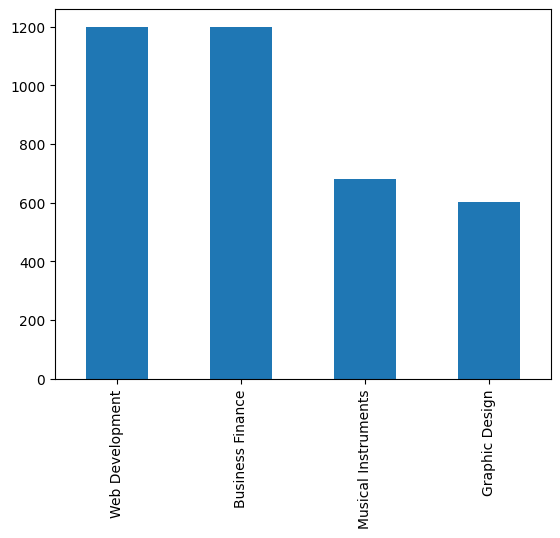

In [ ]:
df['subject'].value_counts().plot(kind='bar')

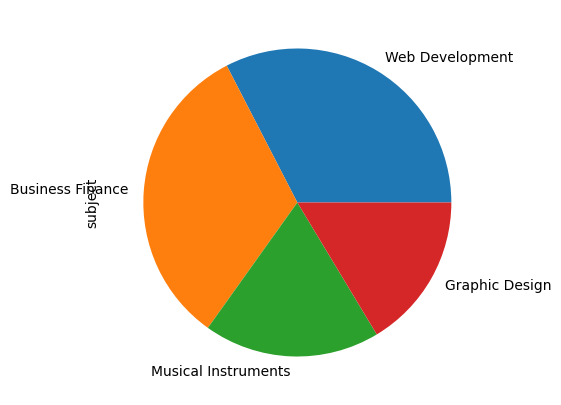

In [ ]:
plt.figure(figsize=(10,5))
df['subject'].value_counts().plot(kind='pie')
plt.show()

In [ ]:
#EDA on taking subscibers as core metric
df['subject'].value_counts()

Web Development        1200
Business Finance       1199
Musical Instruments     681
Graphic Design          603
Name: subject, dtype: int64

In [ ]:
df.groupby('subject')['num_subscribers'].sum()

subject
Business Finance       1870747
Graphic Design         1063148
Musical Instruments     846719
Web Development        7980572
Name: num_subscribers, dtype: int64

<Axes: xlabel='subject'>

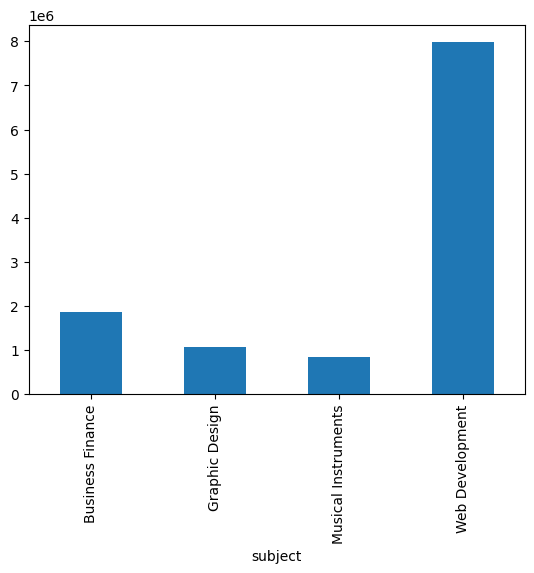

In [ ]:
df.groupby('subject')['num_subscribers'].sum().plot(kind='bar')

In [ ]:
df['num_subscribers'].sum() #total number of subscribers


11761186

In [ ]:
df['num_subscribers'].mean() #average subscriber count per course

3193.3711648112953

In [ ]:
#course wiht the highest number of subscribers
df['num_subscribers'].idxmax()

2832

In [ ]:
df.iloc[2832]

course_id                                                          41295
course_title                        Learn HTML5 Programming From Scratch
url                    https://www.udemy.com/learn-html5-programming-...
is_paid                                                            False
price                                                               Free
num_subscribers                                                   268923
num_reviews                                                         8629
num_lectures                                                          45
level                                                         All Levels
content_duration                                              10.5 hours
published_timestamp                                 2013-02-14T07:03:41Z
subject                                                  Web Development
Name: 2832, dtype: object

In [ ]:
#EDA by taking level of course as core metric
df['level'].value_counts()

All Levels            1932
Beginner Level        1271
Intermediate Level     421
Expert Level            58
52                       1
Name: level, dtype: int64

<Axes: >

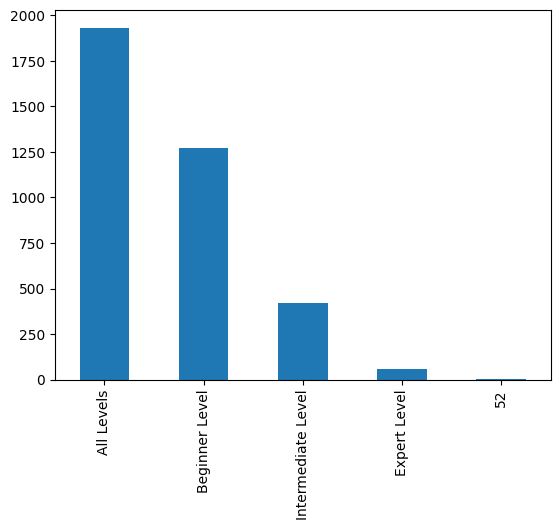

In [ ]:
df['level'].value_counts().plot(kind='bar')

In [ ]:
#number of levels per subject category
df.groupby('subject')['level'].value_counts()

subject              level             
Business Finance     All Levels            699
                     Beginner Level        341
                     Intermediate Level    128
                     Expert Level           31
Graphic Design       All Levels            298
                     Beginner Level        243
                     Intermediate Level     57
                     Expert Level            5
Musical Instruments  Beginner Level        296
                     All Levels            276
                     Intermediate Level    101
                     Expert Level            7
                     52                      1
Web Development      All Levels            659
                     Beginner Level        391
                     Intermediate Level    135
                     Expert Level           15
Name: level, dtype: int64

<Axes: xlabel='subject,level'>

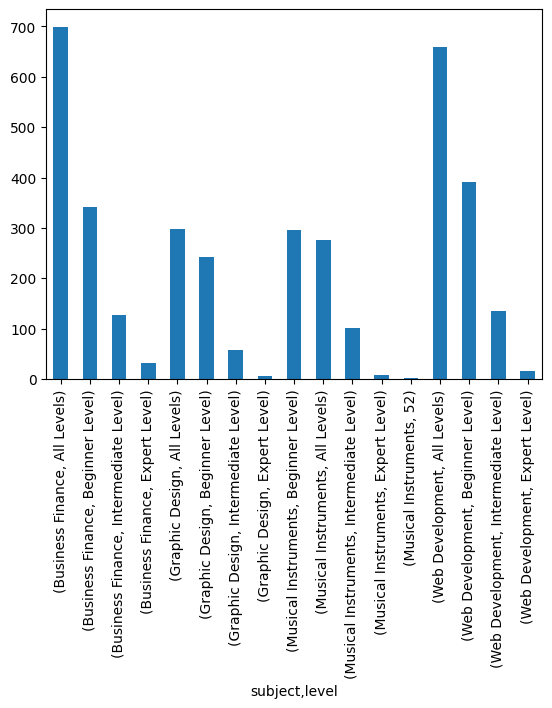

In [ ]:
df.groupby('subject')['level'].value_counts().plot(kind='bar')

In [ ]:
#EDA on taking price as the core metric
df['price'].unique()

array(['200', '75', '45', '95', '150', '65', '195', '30', '20', '50',
       '175', '140', '115', '190', '125', '60', '145', '105', '155',
       '185', '180', '120', '25', '160', '40', 'Free', '100', '90', '35',
       '80', '70', '55', '165', '130', '85', '170', '110', '135', 'TRUE'],
      dtype=object)

In [ ]:
df['is_paid'].unique()

array(['True', 'False', 'FALSE', 'TRUE',
       'https://www.udemy.com/learnguitartoworship/'], dtype=object)

In [ ]:
paid_dict = {'True':True,'False':False,'FALSE':False,'TRUE':True,'https://www.udemy.com/learnguitartoworship/':True}
df['is_paid'] = df['is_paid'].map(paid_dict)

In [ ]:
#How Many Courses on Udemy Are paid or free
df['is_paid'].value_counts()


True     3373
False     310
Name: is_paid, dtype: int64

In [ ]:
df.groupby('is_paid')['subject'].value_counts()

is_paid  subject            
False    Web Development         133
         Business Finance         96
         Musical Instruments      46
         Graphic Design           35
True     Business Finance       1103
         Web Development        1067
         Musical Instruments     635
         Graphic Design          568
Name: subject, dtype: int64

In [ ]:
#Correlation Questions
#Does number of subscribers depend on
#number of reviews
#price
#number of lectures
#content duration

<Axes: xlabel='price', ylabel='num_subscribers'>

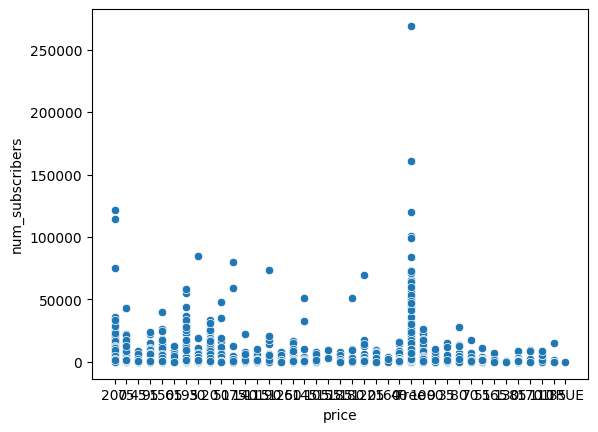

In [ ]:
sns.scatterplot(data = df,x='price', y='num_subscribers')

<Axes: xlabel='price', ylabel='num_reviews'>

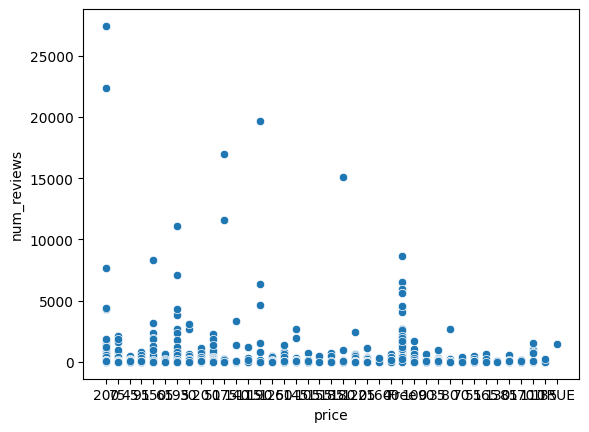

In [ ]:
sns.scatterplot(data = df,x='price', y='num_reviews')

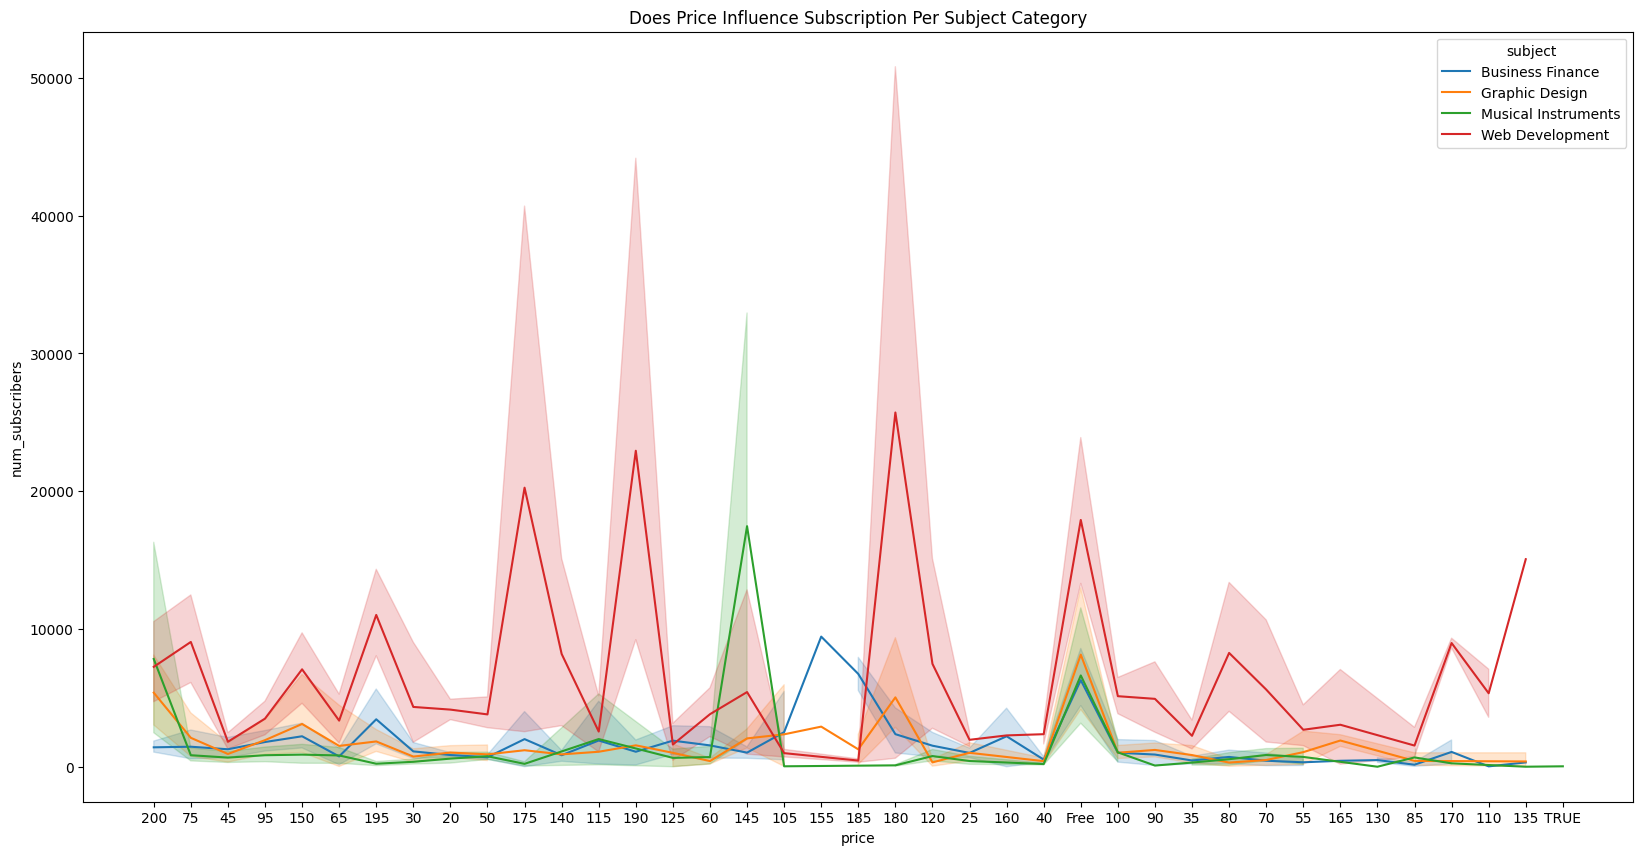

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Does Price Influence Subscription Per Subject Category")
sns.lineplot(data=df,x='price',y='num_subscribers',hue='subject')
plt.show()

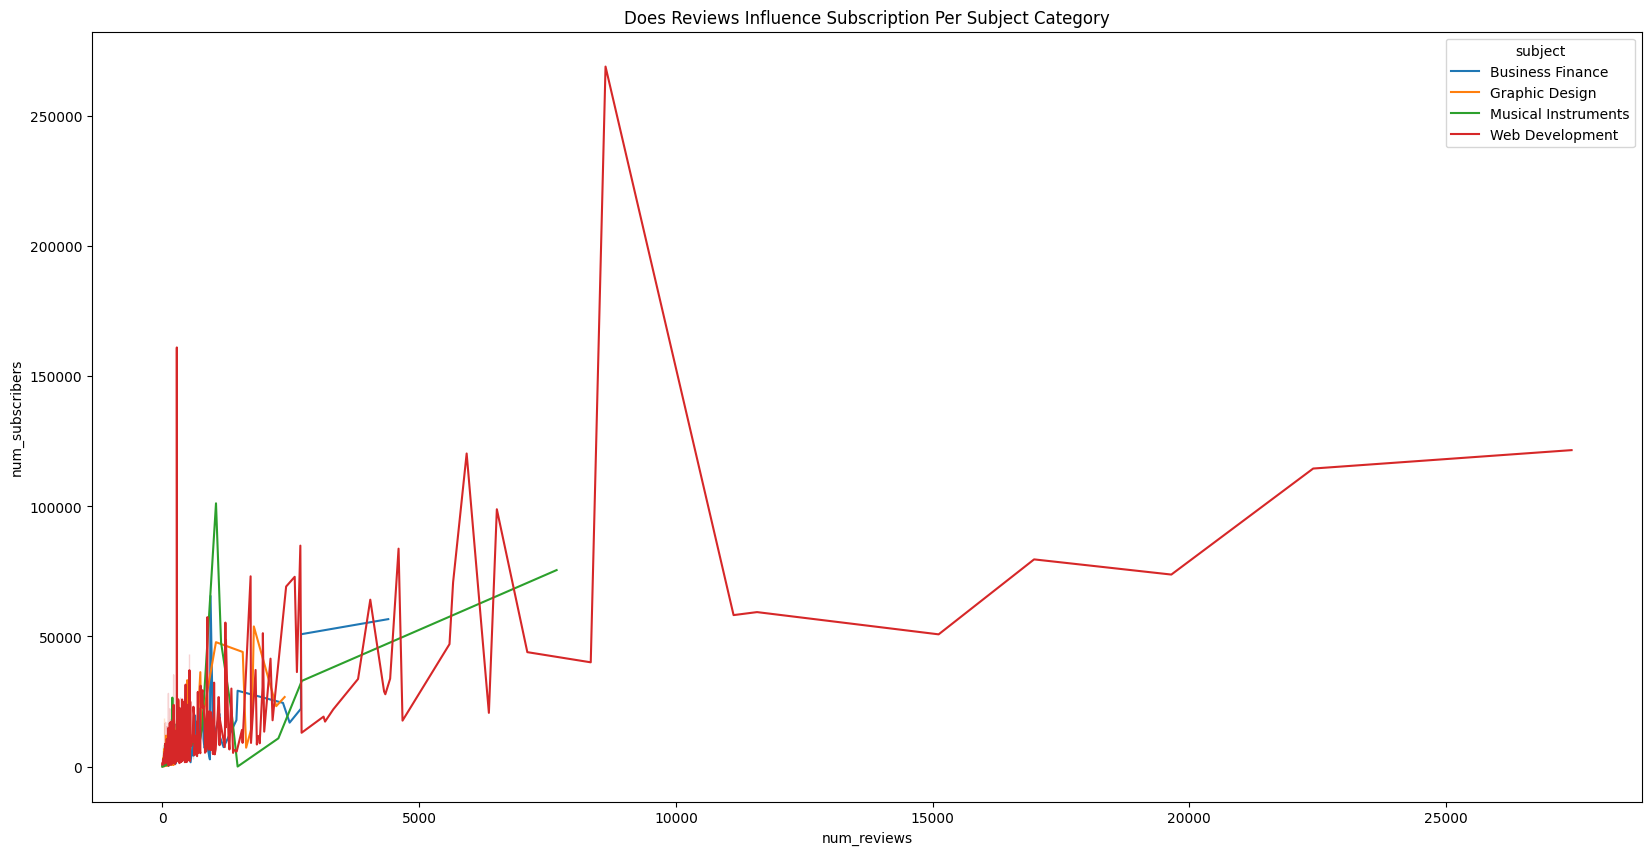

In [ ]:
plt.figure(figsize=(20,10))
plt.title("Does Reviews Influence Subscription Per Subject Category")
sns.lineplot(data=df,x='num_reviews',y='num_subscribers',hue='subject')
plt.show()

In [ ]:
#Question on Time
#Published Year
#Number of courses per year
#Distribution of subjects per year
#Which year has the highest number of courses
#what is the trend of courses per year

In [ ]:
df['published_timestamp'].dtype

dtype('O')

In [ ]:
df['published_timestamp'].head()

0    2017-01-18T20:58:58Z
1    2017-03-09T16:34:20Z
2    2016-12-19T19:26:30Z
3    2017-05-30T20:07:24Z
4    2016-12-13T14:57:18Z
Name: published_timestamp, dtype: object

In [ ]:
df['published_timestamp'].str.split('T')

0       [2017-01-18, 20:58:58Z]
1       [2017-03-09, 16:34:20Z]
2       [2016-12-19, 19:26:30Z]
3       [2017-05-30, 20:07:24Z]
4       [2016-12-13, 14:57:18Z]
                 ...           
3678    [2016-06-14, 17:36:46Z]
3679    [2017-03-10, 22:24:30Z]
3680    [2015-12-30, 16:41:42Z]
3681    [2016-08-11, 19:06:15Z]
3682    [2014-09-28, 19:51:11Z]
Name: published_timestamp, Length: 3683, dtype: object

In [ ]:
df['published_date'] = df['published_timestamp'].str.split('T').str.get(0)

In [ ]:
df['published_date']

0       2017-01-18
1       2017-03-09
2       2016-12-19
3       2017-05-30
4       2016-12-13
           ...    
3678    2016-06-14
3679    2017-03-10
3680    2015-12-30
3681    2016-08-11
3682    2014-09-28
Name: published_date, Length: 3683, dtype: object

In [ ]:
from datetime import datetime
def convert_to_dt(x):
    mydate = datetime.strptime(x,'%Y-%m-%d')
    result = mydate.strftime("%Y-%m-%d")
    return result

In [ ]:
df['published_date'] = df['published_date'].str.replace('3 hours','2017-01-18')
convert_to_dt("2017-01-18")

'2017-01-18'

In [ ]:
df['published_date'].apply(lambda x: convert_to_dt(x))
df.dtypes

course_id               int64
course_title           object
url                    object
is_paid                  bool
price                  object
num_subscribers         int64
num_reviews             int64
num_lectures            int64
level                  object
content_duration       object
published_timestamp    object
subject                object
published_date         object
dtype: object

In [ ]:
df['published_date'] = pd.to_datetime(df['published_date'],format="%Y-%m-%d")
df.dtypes

course_id                       int64
course_title                   object
url                            object
is_paid                          bool
price                          object
num_subscribers                 int64
num_reviews                     int64
num_lectures                    int64
level                          object
content_duration               object
published_timestamp            object
subject                        object
published_date         datetime64[ns]
dtype: object

In [ ]:
df['year'] = df['published_date'].dt.year
df['month'] = df['published_date'].dt.month
df['day'] = df['published_date'].dt.day

**Keyword Extraction from Dataset**

In [ ]:
df['course_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course & Certification - Grow You...
2       Financial Modeling for Business Analysts and C...
3       Beginner to Pro - Financial Analysis in Excel ...
4            How To Maximize Your Profits Trading Options
                              ...                        
3678    Learn jQuery from Scratch - Master of JavaScri...
3679    How To Design A WordPress Website With No Codi...
3680                        Learn and Build using Polymer
3681    CSS Animations: Create Amazing Effects on Your...
3682    Using MODX CMS to Build Websites: A Beginner's...
Name: course_title, Length: 3683, dtype: object

In [ ]:
pip install neattext

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import neattext.functions as nfx

In [ ]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [ ]:
df['clean_title'] = df['course_title'].apply(nfx.remove_stopwords)

In [ ]:
df[['clean_title','course_title']]

,clean_title,course_title
0,Ultimate Investment Banking Course,Ultimate Investment Banking Course
1,Complete GST Course & Certification - Grow Pra...,Complete GST Course & Certification - Grow You...
2,Financial Modeling Business Analysts Consultants,Financial Modeling for Business Analysts and C...
3,Beginner Pro - Financial Analysis Excel 2017,Beginner to Pro - Financial Analysis in Excel ...
4,Maximize Profits Trading Options,How To Maximize Your Profits Trading Options
...,...,...
3678,Learn jQuery Scratch - Master JavaScript library,Learn jQuery from Scratch - Master of JavaScri...
3679,Design WordPress Website Coding,How To Design A WordPress Website With No Codi...
3680,Learn Build Polymer,Learn and Build using Polymer
3681,CSS Animations: Create Amazing Effects Website,CSS Animations: Create Amazing Effects on Your...


In [ ]:
df['clean_title'] = df['clean_title'].apply(nfx.remove_special_characters)

In [ ]:
df['clean_title']

0                      Ultimate Investment Banking Course
1       Complete GST Course  Certification  Grow Practice
2        Financial Modeling Business Analysts Consultants
3             Beginner Pro  Financial Analysis Excel 2017
4                        Maximize Profits Trading Options
                              ...                        
3678      Learn jQuery Scratch  Master JavaScript library
3679                      Design WordPress Website Coding
3680                                  Learn Build Polymer
3681        CSS Animations Create Amazing Effects Website
3682              MODX CMS Build Websites Beginners Guide
Name: clean_title, Length: 3683, dtype: object

In [ ]:
#convert into list and individual words aka tokenisation
all_title_list = df['clean_title'].to_list()
all_title_list[1:100]

['Complete GST Course  Certification  Grow Practice',
 'Financial Modeling Business Analysts Consultants',
 'Beginner Pro  Financial Analysis Excel 2017',
 'Maximize Profits Trading Options',
 'Trading Penny Stocks Guide Levels 2017',
 'Investing Trading Beginners Mastering Price Charts',
 'Trading Stock Chart Patterns Immediate Explosive Gains',
 'Options Trading 3  Advanced Stock Profit Success Method',
 'Investment Strategy Need Retirement',
 'Forex Trading Secrets Pros Amazons AWS',
 'Trading Options Money Flow',
 'Financial Management Risk Return Securities',
 'Forex Trading Course Work Smarter Harder Proven Results',
 'Python Algo Trading Sentiment Trading News',
 'Short Selling Learn Sell Stocks Fall',
 'Basic Technical Analysis Learn structure market',
 'Complete Chart Pattern Trading Course Proven Approach',
 '7 Deadly Mistakes Investing Slash Profits',
 'Financial Statements Easy',
 'Winning Forex Trading Live Forex Trading Examples',
 'Forex Traders  Create Trading Robot Cod

In [ ]:
for line in all_title_list[1:5]:
    print(line.split())
    for i in line.split():
        print(i)

['Complete', 'GST', 'Course', 'Certification', 'Grow', 'Practice']
Complete
GST
Course
Certification
Grow
Practice
['Financial', 'Modeling', 'Business', 'Analysts', 'Consultants']
Financial
Modeling
Business
Analysts
Consultants
['Beginner', 'Pro', 'Financial', 'Analysis', 'Excel', '2017']
Beginner
Pro
Financial
Analysis
Excel
2017
['Maximize', 'Profits', 'Trading', 'Options']
Maximize
Profits
Trading
Options


In [ ]:
#list will now be converted into tokens
token_list = [i for line in all_title_list for i in line.split()]
token_list

['Ultimate',
 'Investment',
 'Banking',
 'Course',
 'Complete',
 'GST',
 'Course',
 'Certification',
 'Grow',
 'Practice',
 'Financial',
 'Modeling',
 'Business',
 'Analysts',
 'Consultants',
 'Beginner',
 'Pro',
 'Financial',
 'Analysis',
 'Excel',
 '2017',
 'Maximize',
 'Profits',
 'Trading',
 'Options',
 'Trading',
 'Penny',
 'Stocks',
 'Guide',
 'Levels',
 '2017',
 'Investing',
 'Trading',
 'Beginners',
 'Mastering',
 'Price',
 'Charts',
 'Trading',
 'Stock',
 'Chart',
 'Patterns',
 'Immediate',
 'Explosive',
 'Gains',
 'Options',
 'Trading',
 '3',
 'Advanced',
 'Stock',
 'Profit',
 'Success',
 'Method',
 'Investment',
 'Strategy',
 'Need',
 'Retirement',
 'Forex',
 'Trading',
 'Secrets',
 'Pros',
 'Amazons',
 'AWS',
 'Trading',
 'Options',
 'Money',
 'Flow',
 'Financial',
 'Management',
 'Risk',
 'Return',
 'Securities',
 'Forex',
 'Trading',
 'Course',
 'Work',
 'Smarter',
 'Harder',
 'Proven',
 'Results',
 'Python',
 'Algo',
 'Trading',
 'Sentiment',
 'Trading',
 'News',
 'Short

In [ ]:
from collections import Counter
word_freq = Counter(token_list)

In [ ]:
dict(word_freq.most_common(30))

{'Learn': 493,
 'Trading': 280,
 'Beginners': 246,
 'Course': 231,
 'Guitar': 210,
 'Web': 205,
 'Design': 187,
 'Complete': 181,
 'Piano': 177,
 'Photoshop': 166,
 'Forex': 163,
 'Build': 161,
 'Financial': 139,
 'Create': 135,
 'JavaScript': 123,
 'Beginner': 120,
 'Guide': 116,
 'HTML': 116,
 'Accounting': 113,
 'Website': 110,
 'Development': 110,
 '2': 106,
 'PHP': 105,
 'Options': 101,
 'Adobe': 100,
 '1': 98,
 'Play': 98,
 'de': 97,
 'Introduction': 93,
 'CSS': 92}

In [ ]:
top_words = dict(word_freq.most_common(50))

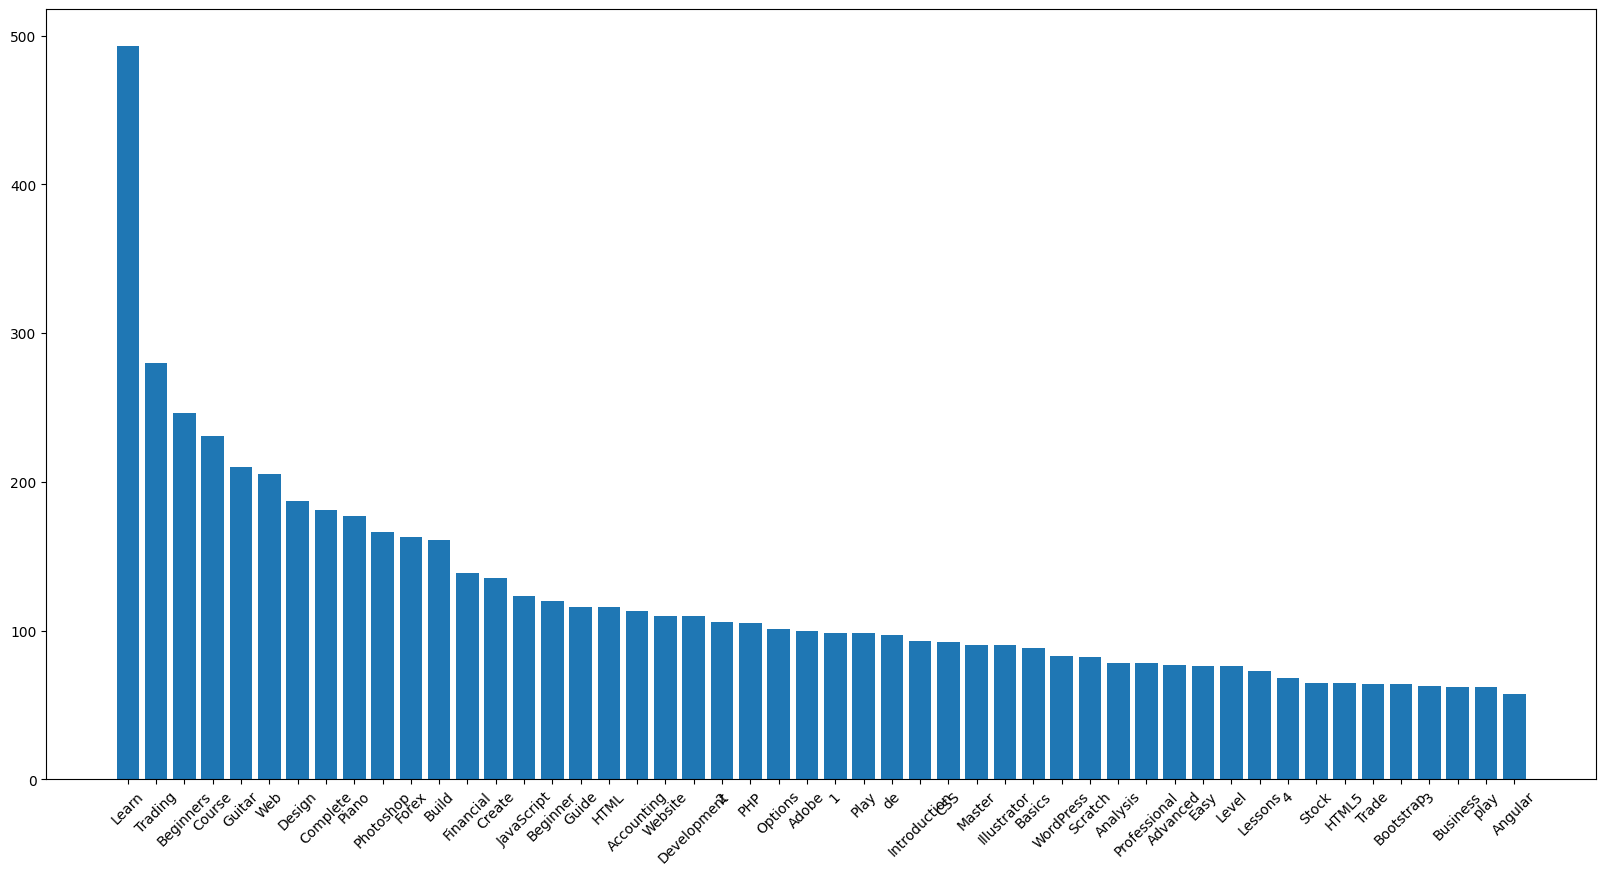

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(*zip(*top_words.items()))
plt.xticks(rotation=45)
plt.show()

In [ ]:
pip install rake_nltk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from rake_nltk import Rake

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
r = Rake()

In [ ]:
join_words = ''.join(token_list)
r.extract_keywords_from_text(join_words)

In [ ]:
print(r.get_ranked_phrases_with_scores())

[(1.0, 'ultimateinvestmentbankingcoursecompletegstcoursecertificationgrowpracticefinancialmodelingbusinessanalystsconsultantsbeginnerprofinancialanalysisexcel2017maximizeprofitstradingoptionstradingpennystocksguidelevels2017investingtradingbeginnersmasteringpricechartstradingstockchartpatternsimmediateexplosivegainsoptionstrading3advancedstockprofitsuccessmethodinvestmentstrategyneedretirementforextradingsecretsprosamazonsawstradingoptionsmoneyflowfinancialmanagementriskreturnsecuritiesforextradingcourseworksmarterharderprovenresultspythonalgotradingsentimenttradingnewsshortsellinglearnsellstocksfallbasictechnicalanalysislearnstructuremarketcompletechartpatterntradingcourseprovenapproach7deadlymistakesinvestingslashprofitsfinancialstatementseasywinningforextradingliveforextradingexamplesforextraderscreatetradingrobotcodingcreatebusinesshometradingstockstoday2017introductionaccountingmasteringfinancialstatementscompleteethereumcourse01etherwalletbeginnerpropowerpointcompletepowerpointtr

In [ ]:
!pip uninstall scikit-learn -y

!pip install -U scikit-learn

Found existing installation: scikit-learn 1.2.2
Uninstalling scikit-learn-1.2.2:
  Successfully uninstalled scikit-learn-1.2.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached scikit_learn-1.2.2-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (9.6 MB)


In [ ]:
#Starting to build the model and the cosine matrix
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity,linear_kernel

In [ ]:
vectorizer = CountVectorizer()
cv_matrix = vectorizer.fit_transform(df['clean_title'])

In [ ]:
cv_matrix

<3683x3564 sparse matrix of type '<class 'numpy.int64'>'
	with 18364 stored elements in Compressed Sparse Row format>

In [ ]:
cv_matrix.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
df_cv_words = pd.DataFrame(cv_matrix.todense(),columns=vectorizer.get_feature_names_out())
df_cv_words.head()


,000005,001,01,02,10,100,101,101master,102,10k,...,zend,zero,zerotohero,zf2,zinsen,zoho,zombie,zu,zuhause,zur
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
cosine_sim_matrix = cosine_similarity(cv_matrix)
cosine_sim_matrix

array([[1.        , 0.20412415, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.20412415, 1.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.23570226],
       [0.        , 0.        , 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.23570226, 0.        ,
        1.        ]])

In [ ]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,year,month,day,clean_title
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,2017-01-18,2017,1,18,Ultimate Investment Banking Course
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,2017-03-09,2017,3,9,Complete GST Course Certification Grow Practice
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,2016-12-19,2016,12,19,Financial Modeling Business Analysts Consultants
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,2017-05-30,2017,5,30,Beginner Pro Financial Analysis Excel 2017
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,2016-12-13,2016,12,13,Maximize Profits Trading Options


In [ ]:
course_indices = pd.Series(df.index,index=df['course_title']).drop_duplicates()

In [ ]:
course_indices

course_title
Ultimate Investment Banking Course                                0
Complete GST Course & Certification - Grow Your CA Practice       1
Financial Modeling for Business Analysts and Consultants          2
Beginner to Pro - Financial Analysis in Excel 2017                3
How To Maximize Your Profits Trading Options                      4
                                                               ... 
Learn jQuery from Scratch - Master of JavaScript library       3678
How To Design A WordPress Website With No Coding At All        3679
Learn and Build using Polymer                                  3680
CSS Animations: Create Amazing Effects on Your Website         3681
Using MODX CMS to Build Websites: A Beginner's Guide           3682
Length: 3683, dtype: int64

In [ ]:
course_indices['Beginner to Pro - Financial Analysis in Excel 2017']

3

In [ ]:
idx = course_indices['Beginner to Pro - Financial Analysis in Excel 2017']
idx

3

In [ ]:
scores = list(enumerate(cosine_sim_matrix[idx]))
scores

[(0, 0.0),
 (1, 0.0),
 (2, 0.18257418583505539),
 (3, 1.0000000000000002),
 (4, 0.0),
 (5, 0.1666666666666667),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.0),
 (10, 0.0),
 (11, 0.0),
 (12, 0.18257418583505539),
 (13, 0.0),
 (14, 0.0),
 (15, 0.0),
 (16, 0.1666666666666667),
 (17, 0.0),
 (18, 0.0),
 (19, 0.2357022603955159),
 (20, 0.0),
 (21, 0.0),
 (22, 0.1543033499620919),
 (23, 0.18257418583505539),
 (24, 0.0),
 (25, 0.2886751345948129),
 (26, 0.0),
 (27, 0.0),
 (28, 0.0),
 (29, 0.1543033499620919),
 (30, 0.0),
 (31, 0.0),
 (32, 0.0),
 (33, 0.0),
 (34, 0.0),
 (35, 0.1543033499620919),
 (36, 0.0),
 (37, 0.0),
 (38, 0.6666666666666669),
 (39, 0.18257418583505539),
 (40, 0.36514837167011077),
 (41, 0.0),
 (42, 0.18257418583505539),
 (43, 0.0),
 (44, 0.0),
 (45, 0.3333333333333334),
 (46, 0.0),
 (47, 0.0),
 (48, 0.0),
 (49, 0.0),
 (50, 0.0),
 (51, 0.0),
 (52, 0.0),
 (53, 0.2357022603955159),
 (54, 0.0),
 (55, 0.0),
 (56, 0.0),
 (57, 0.0),
 (58, 0.0),
 (59, 0.0),
 (60, 0.5443310539518174),
 (

In [ ]:
sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)
sorted_scores

[(3, 1.0000000000000002),
 (38, 0.6666666666666669),
 (60, 0.5443310539518174),
 (1197, 0.5000000000000001),
 (741, 0.4714045207910318),
 (649, 0.4629100498862757),
 (984, 0.4629100498862757),
 (103, 0.4082482904638631),
 (132, 0.4082482904638631),
 (170, 0.4082482904638631),
 (259, 0.4082482904638631),
 (449, 0.4082482904638631),
 (545, 0.4082482904638631),
 (574, 0.4082482904638631),
 (728, 0.4082482904638631),
 (787, 0.4082482904638631),
 (831, 0.4082482904638631),
 (938, 0.4082482904638631),
 (1099, 0.4082482904638631),
 (1117, 0.4082482904638631),
 (1185, 0.4082482904638631),
 (1847, 0.4082482904638631),
 (1139, 0.408248290463863),
 (40, 0.36514837167011077),
 (249, 0.36514837167011077),
 (252, 0.36514837167011077),
 (264, 0.36514837167011077),
 (659, 0.36514837167011077),
 (746, 0.36514837167011077),
 (846, 0.36514837167011077),
 (1216, 0.36514837167011077),
 (45, 0.3333333333333334),
 (270, 0.3333333333333334),
 (272, 0.3333333333333334),
 (395, 0.3333333333333334),
 (421, 0.333

In [ ]:
selected_course_indices = [i[0] for i in sorted_scores[1:]]
selected_course_indices

[38,
 60,
 1197,
 741,
 649,
 984,
 103,
 132,
 170,
 259,
 449,
 545,
 574,
 728,
 787,
 831,
 938,
 1099,
 1117,
 1185,
 1847,
 1139,
 40,
 249,
 252,
 264,
 659,
 746,
 846,
 1216,
 45,
 270,
 272,
 395,
 421,
 723,
 1829,
 1836,
 1840,
 1844,
 1856,
 1966,
 2280,
 2464,
 328,
 380,
 612,
 943,
 1017,
 1843,
 2159,
 2950,
 25,
 425,
 475,
 933,
 1882,
 1955,
 1974,
 2198,
 492,
 237,
 19,
 53,
 101,
 121,
 142,
 180,
 209,
 226,
 247,
 265,
 289,
 302,
 403,
 414,
 454,
 481,
 521,
 536,
 549,
 625,
 643,
 721,
 765,
 780,
 805,
 824,
 840,
 897,
 931,
 939,
 946,
 976,
 985,
 992,
 1013,
 1078,
 1086,
 1160,
 1583,
 2240,
 2244,
 2271,
 2440,
 2469,
 2745,
 2914,
 2937,
 3112,
 3279,
 133,
 254,
 267,
 324,
 335,
 336,
 376,
 400,
 417,
 460,
 484,
 488,
 499,
 531,
 554,
 563,
 576,
 613,
 693,
 710,
 761,
 764,
 773,
 808,
 843,
 865,
 866,
 890,
 908,
 970,
 990,
 1027,
 1028,
 1105,
 1135,
 1145,
 1295,
 1553,
 1584,
 1590,
 1774,
 1819,
 1866,
 1960,
 1988,
 1992,
 2003,
 2046

In [ ]:
selected_course_scores = [i[1] for i in sorted_scores[1:]]
recommended_result = df['course_title'].iloc[selected_course_indices]
rec_df = pd.DataFrame(recommended_result)
rec_df.head()

,course_title
38,Beginner to Pro in Excel: Financial Modeling a...
60,Excel Crash Course: Master Excel for Financial...
1197,Financial Modeling and Valuation: Complete Beg...
741,Financial Ratios Using Excel
649,Financial Statements Analysis: Learn to Invest...


In [ ]:
rec_df['similarity_scores'] = selected_course_scores
rec_df

,course_title,similarity_scores
38,Beginner to Pro in Excel: Financial Modeling a...,0.666667
60,Excel Crash Course: Master Excel for Financial...,0.544331
1197,Financial Modeling and Valuation: Complete Beg...,0.500000
741,Financial Ratios Using Excel,0.471405
649,Financial Statements Analysis: Learn to Invest...,0.462910
...,...,...
3678,Learn jQuery from Scratch - Master of JavaScri...,0.000000
3679,How To Design A WordPress Website With No Codi...,0.000000
3680,Learn and Build using Polymer,0.000000
3681,CSS Animations: Create Amazing Effects on Your...,0.000000


In [ ]:
def recommend_course(title,num_of_rec=10):
    idx = course_indices[title]
    scores = list(enumerate(cosine_sim_matrix[idx]))
    sorted_scores = sorted(scores,key=lambda x:x[1],reverse=True)
    selected_course_indices = [i[0] for i in sorted_scores[1:]]
    selected_course_scores = [i[1] for i in sorted_scores[1:]]
    result = df['course_title'].iloc[selected_course_indices]
    rec_df = pd.DataFrame(result)
    rec_df['similarity_scores'] = selected_course_scores
    return rec_df.head(num_of_rec)
    

In [ ]:
recommend_course('Trading Options Basics',20)

,course_title,similarity_scores
97,Options Trading 101: The Basics,0.866025
195,Trading Options For Consistent Returns: Option...,0.816497
864,Basics of Trading,0.816497
66,Options Trading Basics (3-Course Bundle),0.774597
802,Trading: Basics of Trading for Beginners,0.707107
956,Options Basics & Trading With Small Capital! -...,0.707107
43,Options Trading - How to Win with Weekly Options,0.654654
96,Intermediate Options trading concepts for Stoc...,0.612372
138,Forex Trading with Fixed 'Risk through Options...,0.612372
444,The Advantages of ETF Options and Index Option...,0.612372


In [ ]:
#implementing jacquard similarity as well
df1 = pd.DataFrame(df.loc[df['level']!='Unknown'])
df2 = pd.DataFrame(df1.loc[df1['num_reviews'] != ('Unknown' or 'unknown')])
df2.head(4)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,published_date,year,month,day,clean_title
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,2017-01-18,2017,1,18,Ultimate Investment Banking Course
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,2017-03-09,2017,3,9,Complete GST Course Certification Grow Practice
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,2016-12-19,2016,12,19,Financial Modeling Business Analysts Consultants
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,2017-05-30,2017,5,30,Beginner Pro Financial Analysis Excel 2017


In [ ]:
jaccarfinaldata = df2[["level", "num_reviews"]]
jaccarfinaldata = jaccarfinaldata.set_index('level')
jaccarfinaldata


,num_reviews
level,
All Levels,23
All Levels,923
Intermediate Level,74
All Levels,11
Intermediate Level,45
...,...
All Levels,14
Beginner Level,3
All Levels,169


In [ ]:
from sklearn.metrics import jaccard_score

def jac_similarity(inter, all):
  s1 = set(inter)
  s2 = set(all)
  return float(len(s1.intersection(s2)) / len(s1.union(s2)))
inter = ['45','74']
all = ['14', '11', '31']
jac_similarity(inter, all)




0.0